In [1]:
import os
from os.path import join
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ais_dir = join(os.path.expanduser("~"), "data", "AIS")
data_dir = join(ais_dir, "Syria")

In [15]:
# df = pd.read_csv(join(ais_dir, 'daily_port_export_sector_weight_value.csv'))
df = pd.read_csv(join(ais_dir, "daily_port_import_sector_weight_value.csv"))

In [16]:
df = df.loc[df.GID_0 == "SYR"].copy()

In [17]:
df["date-entry"] = pd.to_datetime(df["date-entry"])

In [18]:
df["ym"] = df["date-entry"].dt.strftime("%Y-%m")

In [19]:
df = df.loc[df["date-entry"] > "2018-12-31"].copy()

In [20]:
sectors = pd.read_excel(join(ais_dir, "sector_conversion.xlsx"))
industries = pd.read_excel(join(ais_dir, "sector_description.xlsx"), "EORA")

In [21]:
sectors.head(2)

,WOIT_sector,Industries
0,1,1
1,2,1


In [22]:
industries.head(2)

,Industries,Description
0,1,Agriculture
1,2,Fishing


In [23]:
df = df.merge(sectors, on="WOIT_sector")

In [24]:
df = df.merge(industries, on="Industries")

In [25]:
df.head(2)

,date-entry,port-name,country,WOIT_sector,Import_sector,value_ton_import,Import_value,Import_value_million,GID_0,ym,Industries,Description
0,2019-01-06,Al Ladhiqiyah,Syria,1,546.403485,499.041154,272677.825733,0.272678,SYR,2019-01,1,Agriculture
1,2019-01-07,Al Ladhiqiyah,Syria,1,743.406168,499.041154,370990.271672,0.370990,SYR,2019-01,1,Agriculture


In [26]:
dfm_imp = df.groupby(["ym", "Industries"]).agg(
    {
        "country": "first",
        "port-name": "first",
        "Description": "first",
        "Import_sector": "sum",
        "value_ton_import": "sum",
        "Import_value": "sum",
        "Import_value_million": "sum",
    }
)

In [14]:
dfm_exp = df.groupby(["ym", "Industries"]).agg(
    {
        "country": "first",
        "port-name": "first",
        "Description": "first",
        "Export_sector": "sum",
        "value_ton_export": "sum",
        "Export_value": "sum",
        "Export_value_million": "sum",
    }
)

In [27]:
dfm_exp.reset_index(inplace=True)
dfm_imp.reset_index(inplace=True)
# dfm.reset_index(inplace=True)

In [28]:
dfm = dfm_imp.merge(
    dfm_exp, on=["ym", "Industries", "country", "port-name", "Description"]
)

In [29]:
dfm.head(2)

,ym,Industries,country,port-name,Description,Import_sector,value_ton_import,Import_value,Import_value_million,Export_sector,value_ton_export,Export_value,Export_value_million
0,2019-01,1,Syria,Al Ladhiqiyah,Agriculture,1490.096302,3486.830410,741742.149715,0.741742,521.094504,3484.602662,614972.655553,0.614973
1,2019-01,2,Syria,Al Ladhiqiyah,Fishing,9.807004,4623.162713,11334.843468,0.011335,16.268392,843.859566,13728.238066,0.013728


In [34]:
# dfm.to_csv(join(ais_dir, "paper_trade_values_daily.csv"))

In [30]:
df_agg = dfm[
    [
        "ym",
        "port-name",
        "Import_sector",
        "Import_value_million",
        "Export_sector",
        "Export_value_million",
    ]
]
# df_agg = dfm[['ym', 'port-name', 'Export_sector', 'Export_value_million']]

In [31]:
df_agg.to_csv(join(ais_dir, "paper_trade_values_ym.csv"))

In [28]:
df_agg = df_agg.groupby(["ym", "port-name"]).sum()

In [29]:
df_agg.reset_index(inplace=True)

In [53]:
# df_agg.set_index('date-entry', inplace=True)
# df_agg.index = df_agg.index.strftime('%m-%d')
# df_agg.reset_index(inplace=True)

In [54]:
# x_dates = df_agg['date-entry'].dt.strftime('%Y-%m-%d').sort_values().unique()
x_dates = df_agg["ym"].unique()

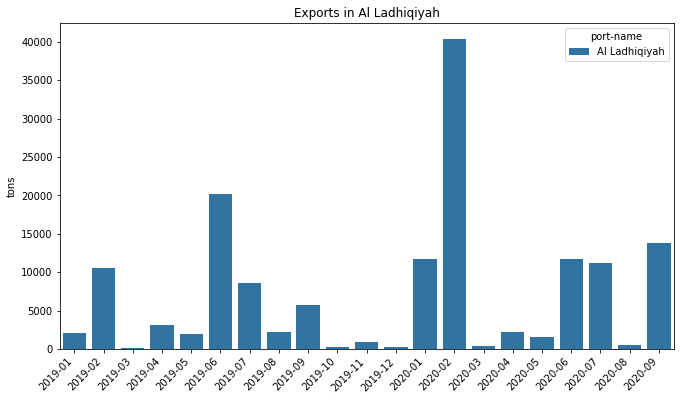

In [55]:
fig, ax = plt.subplots(figsize=(11, 6))
ax = sns.barplot(
    data=df_agg, x="ym", y="Export_sector", hue="port-name"
)  # hue="polygon_name", palette="tab10"
ax.set(xlabel="", ylabel="tons", title="Exports in Al Ladhiqiyah")
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
plt.show()

In [59]:
df_agg[["ym", "Import_sector", "Export_sector"]]

,ym,Import_sector,Export_sector
0,2019-01,10252.467190,2078.347219
1,2019-02,21552.831445,10531.199636
2,2019-03,40068.502797,99.536773
3,2019-04,92870.800027,3133.678289
4,2019-05,84045.322427,2020.237526
5,2019-06,61722.554470,20171.920608
6,2019-07,132905.384189,8629.128093
7,2019-08,127013.598795,2219.734645
8,2019-09,81125.580826,5753.666780
9,2019-10,60233.734180,298.937433


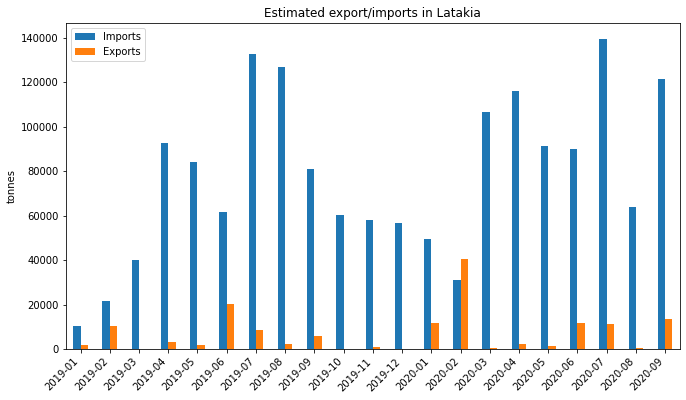

In [57]:
fig, ax = plt.subplots(figsize=(11, 6))
df_agg[["ym", "Import_sector", "Export_sector"]].set_index("ym").plot(
    ax=ax, kind="bar", stacked=False
)
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
ax.set(xlabel="", ylabel="tonnes", title="Estimated export/imports in Latakia")
plt.legend(
    title="", labels=["Imports", "Exports"]
)  # loc='upper right', labels=['Raw Data', 'Interpolated']

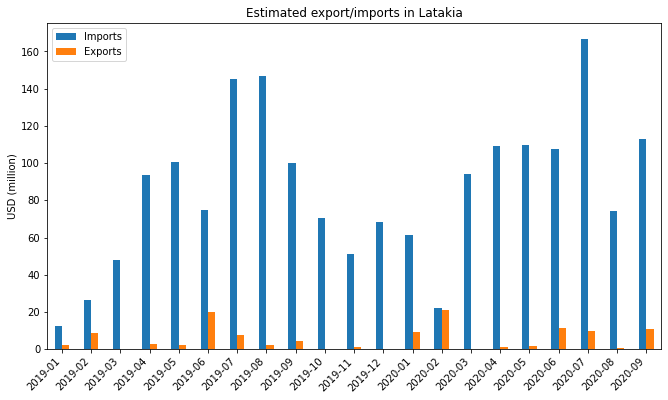

In [58]:
fig, ax = plt.subplots(figsize=(11, 6))
df_agg[["ym", "Import_value_million", "Export_value_million"]].set_index("ym").plot(
    ax=ax, kind="bar", stacked=False
)
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
ax.set(xlabel="", ylabel="USD (million)", title="Estimated export/imports in Latakia")
plt.legend(
    title="", labels=["Imports", "Exports"]
)  # loc='upper right', labels=['Raw Data', 'Interpolated']

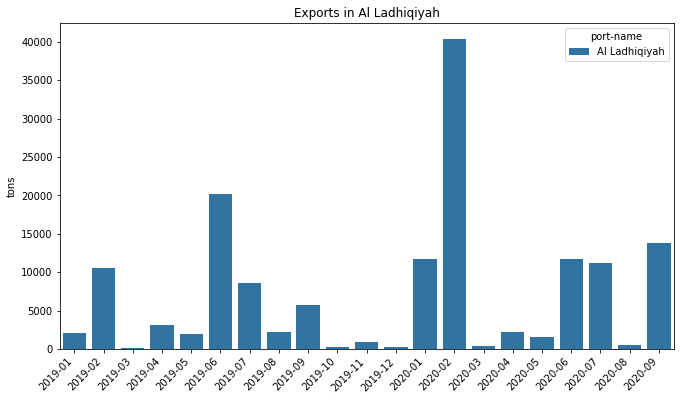

In [46]:
fig, ax = plt.subplots(figsize=(11, 6))
ax = sns.barplot(
    data=df_agg, x="ym", y="Export_sector", hue="port-name"
)  # hue="polygon_name", palette="tab10"
ax.set(xlabel="", ylabel="tons", title="Exports in Al Ladhiqiyah")
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
plt.show()

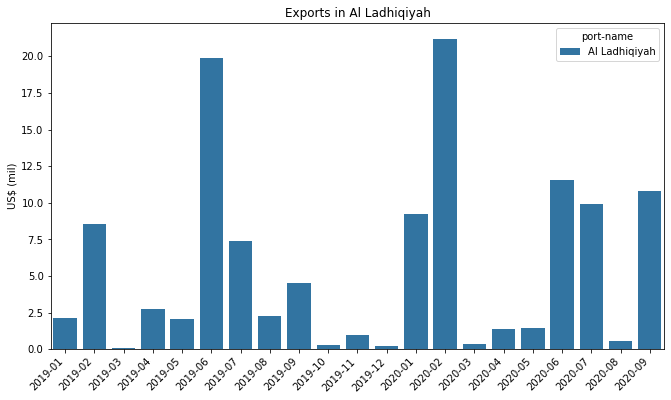

In [49]:
fig, ax = plt.subplots(figsize=(11, 6))
ax = sns.barplot(
    data=df_agg, x="ym", y="Export_value_million", hue="port-name"
)  # hue="polygon_name", palette="tab10"
ax.set(xlabel="", ylabel="US$ (mil)", title="Exports in Al Ladhiqiyah")
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
plt.show()

In [26]:
# fig, ax = plt.subplots(figsize=(11, 6))
# ax = sns.barplot(data=df_agg, x="date-entry", y='Export_sector', hue='port-name') # hue="polygon_name", palette="tab10"
# ax.set(xlabel="", ylabel="", title="Exports")
# # plt.legend(title='') #loc='upper right', labels=['Raw Data', 'Interpolated']
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# plt.show()
# plt.savefig("../docs/images/Output_Mining_Gas.png", facecolor='white', dpi=300)

In [61]:
df2 = dfm[["ym", "Description", "Export_value_million"]].copy().set_index("ym")

In [62]:
df2 = df2.pivot(columns="Description", values="Export_value_million").fillna(0)

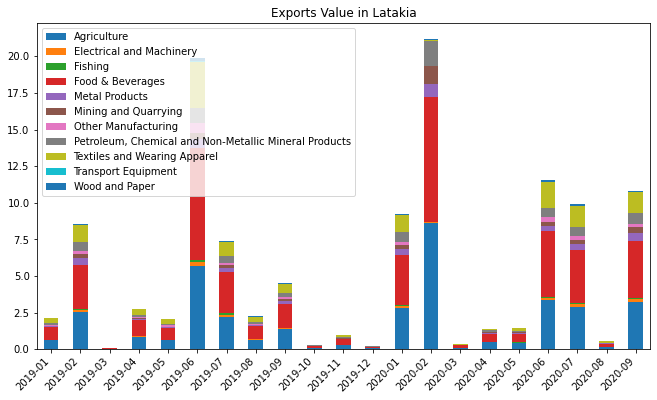

In [63]:
fig, ax = plt.subplots(figsize=(11, 6))
df2.plot(ax=ax, kind="bar", stacked=True)
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
ax.set(xlabel="", ylabel="", title="Exports Value in Latakia")
plt.legend(title="")  # loc='upper right', labels=['Raw Data', 'Interpolated']

In [53]:
df2 = dfm[["ym", "Description", "Export_sector"]].copy().set_index("ym")

In [54]:
df2 = df2.pivot(columns="Description", values="Export_sector").fillna(0)

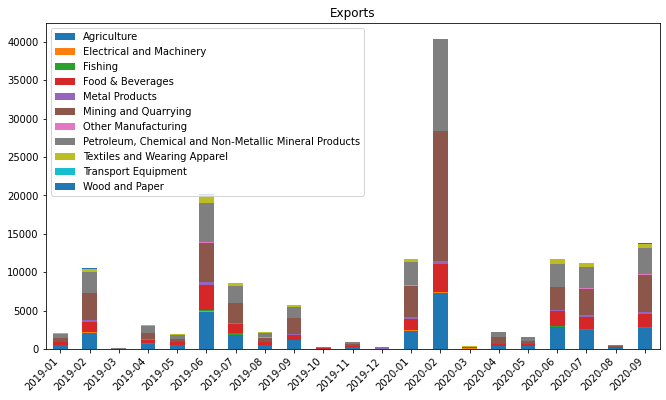

In [55]:
fig, ax = plt.subplots(figsize=(11, 6))
df2.plot(ax=ax, kind="bar", stacked=True)
ax.set_xticklabels(labels=x_dates, rotation=45, ha="right")
ax.set(xlabel="", ylabel="", title="Exports")
plt.legend(title="")  # loc='upper right', labels=['Raw Data', 'Interpolated']